In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, TargetEncoder


In [337]:
# load data
final_data = pd.read_csv('gdsc_dataset.csv')

In [338]:
# Overview data
print(final_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242036 entries, 0 to 242035
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   COSMIC_ID                     242036 non-null  int64  
 1   CELL_LINE_NAME                242036 non-null  object 
 2   TCGA_DESC                     240969 non-null  object 
 3   DRUG_ID                       242036 non-null  int64  
 4   DRUG_NAME                     242036 non-null  object 
 5   PATHWAY_NAME                  242036 non-null  object 
 6   MIN_CONC                      242036 non-null  float64
 7   MAX_CONC                      242036 non-null  float64
 8   LN_IC50                       242036 non-null  float64
 9   AUC                           242036 non-null  float64
 10  RMSE                          242036 non-null  float64
 11  Z_SCORE                       242036 non-null  float64
 12  Whole Exome Sequencing (WES)  232670 non-nul

In [339]:
# Statistical information of numeric features
numeric_cols = ['MIN_CONC','MAX_CONC','LN_IC50', 'AUC', 'RMSE', 'Z_SCORE']
final_data[numeric_cols].describe()

,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
count,242036.000000,242036.000000,242036.000000,242036.000000,242036.000000,2.420360e+05
mean,0.023143,23.462279,2.817079,0.882592,0.082779,7.312962e-10
std,0.158738,158.622810,2.762229,0.146998,0.042695,9.993925e-01
min,0.000010,0.010000,-8.747724,0.006282,0.003274,-8.254501e+00
25%,0.003002,3.000000,1.508018,0.849449,0.051107,-6.568485e-01
50%,0.010005,10.000000,3.236731,0.944196,0.076083,1.058000e-02
75%,0.010005,10.000000,4.700110,0.974934,0.106105,6.560362e-01
max,2.001054,2000.000000,13.820189,0.998904,0.299984,7.978776e+00


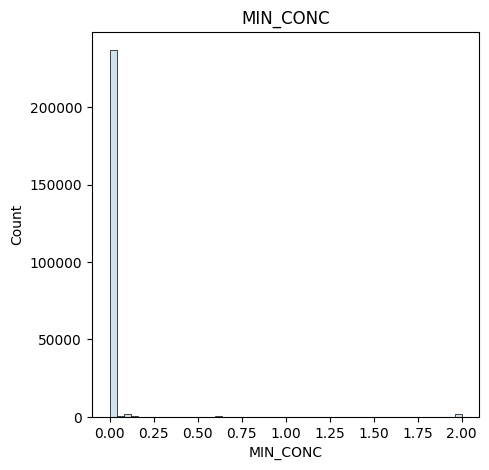

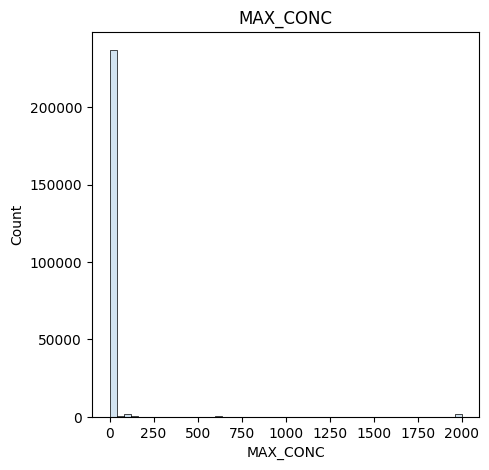

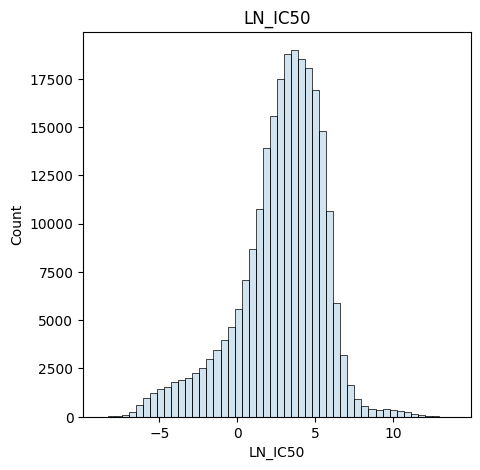

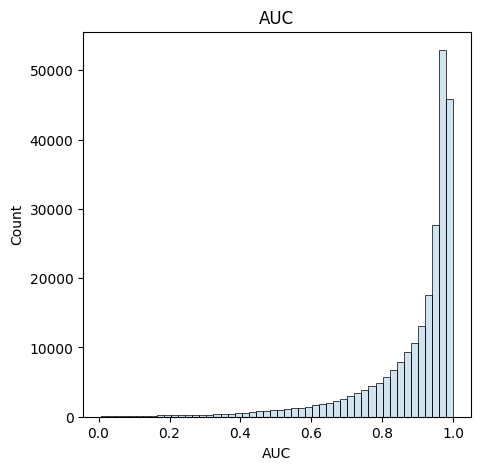

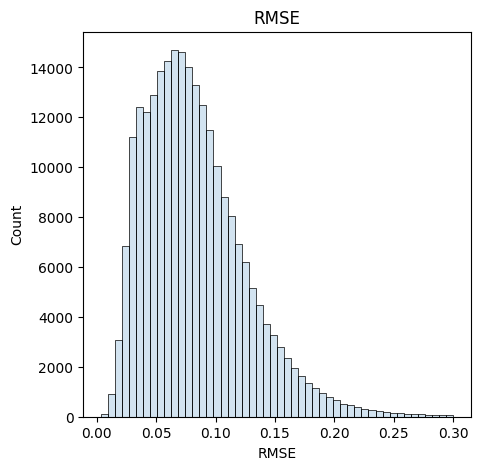

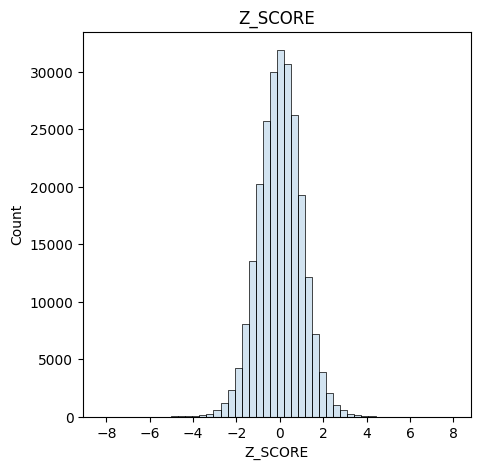

In [340]:
# Check for outliers through graphs
for column in numeric_cols:
    plt.figure(figsize=(5, 5))
    sns.histplot(x=column, data=final_data, alpha=0.2, bins = 50)
    plt.title(column)
    plt.show()

In [341]:
# MAX and MIN concentration top lining: check 2000 for MAX and 2 for MIN
print(final_data['MAX_CONC'].value_counts())
print(final_data['MIN_CONC'].value_counts())
# No outliers to drop

MAX_CONC
10.000000      142075
1.000000        22188
2.000000        13576
3.000000        13575
5.000000        10618
20.000000        7077
30.000000        6874
0.100000         5013
4.000000         3129
0.010000         2800
100.000000       1788
0.020000         1686
2000.000000      1467
0.500000         1383
0.250000         1185
0.012500          967
2.500000          962
0.800000          942
32.000000         743
121.000000        735
640.000000        732
40.000000         731
6.000000          715
8.000000          468
50.000000         370
0.200000          225
0.316256           12
Name: count, dtype: int64
MIN_CONC
0.010005    128564
0.001001     23120
0.002001     14619
0.003002     14198
0.005003     12855
0.020011      7684
0.030016      6825
0.000100      5499
0.004002      5396
0.000010      2918
0.000250      2572
0.100053      1788
0.000020      1693
0.009766      1548
2.001054      1467
0.000500      1395
0.008004      1036
0.007813       972
0.000800       942
0

In [342]:
# Statistical information and unique values of categorical features
# Check need of one - hot encoding; especially for cell line name and drug name
final_data.select_dtypes(include= 'object').describe().transpose()


,count,unique,top,freq
CELL_LINE_NAME,242036,969,PC-14,295
TCGA_DESC,240969,32,UNCLASSIFIED,45691
DRUG_NAME,242036,286,Ulixertinib,1698
PATHWAY_NAME,242036,24,Unclassified,24979
Whole Exome Sequencing (WES),232670,1,Y,232670
Gene Expression,232670,2,Y,227886
Methylation,232670,2,Y,225082
Drug Response,232670,2,Y,231244
GDSC Tissue descriptor 1,232670,19,lung_NSCLC,26977
GDSC Tissue descriptor 2,232670,54,lung_NSCLC_adenocarcinoma,16112


In [343]:
# Overview unique values of categorical columns 
cat_cols = final_data.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\nTop values for '{col}':")
    print(final_data[col].value_counts().head(10))



Top values for 'CELL_LINE_NAME':
CELL_LINE_NAME
PC-14         295
SW620         295
HT-29         295
U-2-OS        294
MHH-ES-1      294
C32           294
A375          294
HCC70         284
MDA-MB-157    284
EFM-19        284
Name: count, dtype: int64

Top values for 'TCGA_DESC':
TCGA_DESC
UNCLASSIFIED    45691
LUAD            15653
SCLC            13570
BRCA            13106
SKCM            12637
COREAD          12538
HNSC             9358
ESCA             9126
GBM              8384
OV               8166
Name: count, dtype: int64

Top values for 'DRUG_NAME':
DRUG_NAME
Ulixertinib     1698
Oxaliplatin     1684
Fulvestrant     1680
Selumetinib     1666
Dactinomycin    1659
Docetaxel       1637
GSK343          1634
Uprosertib      1634
Acetalax        1434
MG-132           969
Name: count, dtype: int64

Top values for 'PATHWAY_NAME':
PATHWAY_NAME
Unclassified                     24979
PI3K/MTOR signaling              22724
Other                            21402
DNA replication        

In [344]:
# Check if Drug Id and drug name values match
print(final_data['DRUG_ID'].nunique())
# Numbers are not same 

# Check if COSMIC ID and cell line name values match
print(final_data['COSMIC_ID'].nunique())
# unique values are same: 979

295
969


In [345]:
# Figuring out which drug names have multiple IDs
drug_map = final_data[['DRUG_ID','DRUG_NAME']]

id_per_name = final_data.groupby('DRUG_NAME')['DRUG_ID'].nunique()
duplicates = id_per_name[id_per_name > 1]
print(f"Drug names linked to multiple IDs: {len(duplicates)}")
print(duplicates)
print()

# Get the pairs that aren't 1-to-1
conflicting_pairs = drug_map.drop_duplicates()
conflicting = conflicting_pairs[conflicting_pairs['DRUG_NAME'].isin(duplicates.index)]
conflicting_sorted = conflicting.sort_values('DRUG_NAME')
print(conflicting_sorted)
print()


Drug names linked to multiple IDs: 9
DRUG_NAME
Acetalax        2
Dactinomycin    2
Docetaxel       2
Fulvestrant     2
GSK343          2
Oxaliplatin     2
Selumetinib     2
Ulixertinib     2
Uprosertib      2
Name: DRUG_ID, dtype: int64

        DRUG_ID     DRUG_NAME
145052     1804      Acetalax
144335     1803      Acetalax
180104     1911  Dactinomycin
148637     1811  Dactinomycin
153655     1819     Docetaxel
3212       1007     Docetaxel
69109      1200   Fulvestrant
152221     1816   Fulvestrant
207847     2037        GSK343
117542     1627        GSK343
145769     1806   Oxaliplatin
55178      1089   Oxaliplatin
133166     1736   Selumetinib
42959      1062   Selumetinib
215011     2047   Ulixertinib
177231     1908   Ulixertinib
90529      1553    Uprosertib
218768     2106    Uprosertib



In [346]:
# Keep one DRUG_ID per DRUG_NAME (e.g., the smallest)
remapping_dict = { 1804:1803, 1911:1811, 1819:1007, 1200:1816, 2037:1627, 1806:1089, 1736:1062, 2047:1908, 1553:2106 }

final_data['DRUG_ID'] = final_data['DRUG_ID'].replace(remapping_dict)

# Check if Drug Id and drug name values match
print(final_data['DRUG_ID'].nunique())
# Numbers are same

# Will be using Drug ID instead of Drug Name
final_data.drop(columns = 'DRUG_ID')

286


,COSMIC_ID,CELL_LINE_NAME,TCGA_DESC,DRUG_NAME,PATHWAY_NAME,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,...,Whole Exome Sequencing (WES),Gene Expression,Methylation,Drug Response,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,CANCER_TYPE,MSI,Growth Properties,TARGET
0,683667,PFSK-1,MB,Camptothecin,DNA replication,0.000100,0.1,-1.463887,0.930220,0.089052,...,Y,Y,Y,Y,nervous_system,medulloblastoma,MB,MSS/MSI-L,Adherent,TOP1
1,684052,A673,UNCLASSIFIED,Camptothecin,DNA replication,0.000100,0.1,-4.869455,0.614970,0.111351,...,Y,Y,Y,Y,soft_tissue,rhabdomyosarcoma,NaN,MSS/MSI-L,Adherent,TOP1
2,684057,ES5,UNCLASSIFIED,Camptothecin,DNA replication,0.000100,0.1,-3.360586,0.791072,0.142855,...,Y,Y,Y,Y,bone,ewings_sarcoma,NaN,MSS/MSI-L,Adherent,TOP1
3,684059,ES7,UNCLASSIFIED,Camptothecin,DNA replication,0.000100,0.1,-5.044940,0.592660,0.135539,...,Y,Y,Y,Y,bone,ewings_sarcoma,NaN,MSS/MSI-L,Adherent,TOP1
4,684062,EW-11,UNCLASSIFIED,Camptothecin,DNA replication,0.000100,0.1,-3.741991,0.734047,0.128059,...,Y,Y,Y,Y,bone,ewings_sarcoma,NaN,MSS/MSI-L,Adherent,TOP1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242031,1659928,SNU-175,COREAD,N-acetyl cysteine,Metabolism,2.001054,2000.0,10.127082,0.976746,0.074498,...,Y,Y,Y,Y,large_intestine,large_intestine,COAD/READ,MSI-H,Suspension,Metabolism
242032,1660034,SNU-407,COREAD,N-acetyl cysteine,Metabolism,2.001054,2000.0,8.576377,0.913378,0.057821,...,Y,Y,Y,Y,large_intestine,large_intestine,COAD/READ,MSI-H,Adherent,Metabolism
242033,1660035,SNU-61,COREAD,N-acetyl cysteine,Metabolism,2.001054,2000.0,10.519636,0.975001,0.058090,...,Y,Y,Y,Y,large_intestine,large_intestine,COAD/READ,MSS/MSI-L,Adherent,Metabolism
242034,1674021,SNU-C5,COREAD,N-acetyl cysteine,Metabolism,2.001054,2000.0,10.694579,0.969969,0.101013,...,Y,Y,Y,Y,large_intestine,large_intestine,COAD/READ,MSI-H,Adherent,Metabolism


In [347]:
# Check for missing values
print(final_data.isnull().sum())

COSMIC_ID                           0
CELL_LINE_NAME                      0
TCGA_DESC                        1067
DRUG_ID                             0
DRUG_NAME                           0
PATHWAY_NAME                        0
MIN_CONC                            0
MAX_CONC                            0
LN_IC50                             0
AUC                                 0
RMSE                                0
Z_SCORE                             0
Whole Exome Sequencing (WES)     9366
Gene Expression                  9366
Methylation                      9366
Drug Response                    9366
GDSC Tissue descriptor 1         9366
GDSC Tissue descriptor 2         9366
CANCER_TYPE                     51447
MSI                             12353
Growth Properties                9366
TARGET                          27155
dtype: int64


In [348]:
# Check for missing values
def check_missing_values_by_drug(df):
    missing_values = {}

    for drug in df['DRUG_NAME'].unique():
        drug_data = df[df['DRUG_NAME'] == drug]
        missing_values[drug] =drug_data.isnull().sum()
    
    return missing_values

drug_missing_values = check_missing_values_by_drug(final_data)

for drug, missing_counts in drug_missing_values.items():
    print(f"\nMissing values for {drug}:")
    print(missing_counts)
    print(f"Total missing values: {missing_counts.sum()}")
    print("-" * 50)  

    


Missing values for Camptothecin:
COSMIC_ID                         0
CELL_LINE_NAME                    0
TCGA_DESC                         6
DRUG_ID                           0
DRUG_NAME                         0
PATHWAY_NAME                      0
MIN_CONC                          0
MAX_CONC                          0
LN_IC50                           0
AUC                               0
RMSE                              0
Z_SCORE                           0
Whole Exome Sequencing (WES)     39
Gene Expression                  39
Methylation                      39
Drug Response                    39
GDSC Tissue descriptor 1         39
GDSC Tissue descriptor 2         39
CANCER_TYPE                     205
MSI                              53
Growth Properties                39
TARGET                            0
dtype: int64
Total missing values: 537
--------------------------------------------------

Missing values for Vinblastine:
COSMIC_ID                         0
CELL_LINE_NAME 

Different drugs have different patterns of null data
Will be approaching missing values by drugs and by categories

GDSC tissue descriptor / Cancer type / TGCA desc: use related tissue information (mode) within each drug subset

TARGET / PATHWAY_NAME : fill in with unknown

WES / Gene Expression / Methylation: will attempt to impute based on tissue type, then use KNN imputer

MSI, Growth Properties : use mode within each drug subset also


Use KNN imputer, which fills in missing values utilizing KNN algorithm

In [349]:
def handling_null(df):
    knn_imputer = KNNImputer(n_neighbors = 5) # Instantiate object

    for drug in df['DRUG_NAME'].unique():
        drug_data = df[df['DRUG_NAME'] == drug].copy() # Since creating multiple seperate drug datasets use .copy()
    
        # Descriptor information filling
        desc_cols = ['TCGA_DESC', 'GDSC Tissue descriptor 1', 'GDSC Tissue descriptor 2', 'CANCER_TYPE']

        for col in desc_cols:
            if drug_data[col].isnull().any(): # if there are any null values
                for other_col in [c for c in desc_cols if c != col]: # Other columns in desc_cols
                    grouped = drug_data.groupby(other_col)[col] # Group by other columns
                    modes = grouped.transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown') # Return the first mode value if mode is not empty
                    drug_data[col] = drug_data[col].fillna(modes)

                # If still null, use overall mode
                drug_data[col] = drug_data[col].fillna(drug_data[col].mode()[0] if not drug_data[col].mode().empty else 'Unknown')

    # Target and pathway filling
        tp_cols = ['TARGET', 'PATHWAY_NAME']

        for col in tp_cols:
            if drug_data[col].isnull().all():
                drug_data[col] = 'Unknown for this drug'
            #else:
                #known_target = drug_data[col].dropna().iloc[0]
                #drug_data[col] = drug_data[col].fillna(known_target)

        # MSI and Growth properties
        msi_gp_cols = ['MSI', 'Growth Properties']
        
        for col in msi_gp_cols:
            if drug_data[col].isnull().any():
                # Group by primary tissue description
                drug_data[col] = drug_data.groupby('GDSC Tissue descriptor 1')[col].transform(
                    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
                    )
                
        # Genomic Features
        genomic_cols = ['Whole Exome Sequencing (WES)', 'Gene Expression', 'Methylation', 'Drug Response']

        for col in genomic_cols:
            if drug_data[col].isnull().any():
                # Group by primary tissue description
                drug_data[col] = drug_data.groupby('GDSC Tissue descriptor 1')[col].transform(
                    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
                    )
                # If still null use knn imputer
                if drug_data[col].isnull().any():
                    feature_data = pd.get_dummies(drug_data[col], prefix=col) # One hot encoding
                    imputed_data = knn_imputer.fit_transform(feature_data)
                    imputed_df = pd.DataFrame(imputed_data, columns=feature_data.columns, index=feature_data.index)
                    drug_data[col] = imputed_df.idxmax(axis=1).str.split('_').str[1]
     
        df.loc[df['DRUG_NAME'] == drug] = drug_data
    return df

cleaned_data = handling_null(final_data)



/var/folders/gn/8692wbbn2jqbdbljkddblglm0000gn/T/ipykernel_77083/1356287288.py:47: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
/var/folders/gn/8692wbbn2jqbdbljkddblglm0000gn/T/ipykernel_77083/1356287288.py:47: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
/var/folders/gn/8692wbbn2jqbdbljkddblglm0000gn/T/ipykernel_77083/1356287288.py:47: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated

In [350]:
# Check for missing values again
print(cleaned_data.isnull().sum())


COSMIC_ID                       0
CELL_LINE_NAME                  0
TCGA_DESC                       0
DRUG_ID                         0
DRUG_NAME                       0
PATHWAY_NAME                    0
MIN_CONC                        0
MAX_CONC                        0
LN_IC50                         0
AUC                             0
RMSE                            0
Z_SCORE                         0
Whole Exome Sequencing (WES)    0
Gene Expression                 0
Methylation                     0
Drug Response                   0
GDSC Tissue descriptor 1        0
GDSC Tissue descriptor 2        0
CANCER_TYPE                     0
MSI                             0
Growth Properties               0
TARGET                          0
dtype: int64


In [351]:
# Check unique values of features
print(cleaned_data.info())
print(cleaned_data.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242036 entries, 0 to 242035
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   COSMIC_ID                     242036 non-null  int64  
 1   CELL_LINE_NAME                242036 non-null  object 
 2   TCGA_DESC                     242036 non-null  object 
 3   DRUG_ID                       242036 non-null  int64  
 4   DRUG_NAME                     242036 non-null  object 
 5   PATHWAY_NAME                  242036 non-null  object 
 6   MIN_CONC                      242036 non-null  float64
 7   MAX_CONC                      242036 non-null  float64
 8   LN_IC50                       242036 non-null  float64
 9   AUC                           242036 non-null  float64
 10  RMSE                          242036 non-null  float64
 11  Z_SCORE                       242036 non-null  float64
 12  Whole Exome Sequencing (WES)  242036 non-nul

In [366]:
# Encode categorical features
def encoding_features(df, target = 'LN_IC50'):
    
    # For binary features
    binary = [col for col in df.columns if df[col].nunique() == 2]
    for feature in binary:
        df[feature] = (df[feature] == df[feature].unique()[0]).astype(int) # Creates boolean series consisting of 1 and 0

    # For features with small counts of unique value (low-cardinality), use one hot encoder
    onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False returns as np array
    
    msi_encoded = onehot_encoder.fit_transform(df[['MSI']])
    msi_columns = onehot_encoder.get_feature_names_out(['MSI']) # renames the columns
    msi_onehot = pd.DataFrame(msi_encoded, columns=msi_columns, index=df.index)

    gp_encoded = onehot_encoder.fit_transform(df[['Growth Properties']])
    gp_columns = onehot_encoder.get_feature_names_out(['Growth Properties'])
    gp_onehot = pd.DataFrame(gp_encoded, columns=gp_columns, index=df.index)

    # For high cardinality features
    high_feature = ['TCGA_DESC', 'DRUG_NAME', 'GDSC Tissue descriptor 1', 'GDSC Tissue descriptor 2', 
                    'CANCER_TYPE', 'TARGET', 'PATHWAY_NAME']
    target_encoder = TargetEncoder()
    df_high_encoded = target_encoder.fit_transform(df[high_feature], df[target])
    df_high_encoded = pd.DataFrame(df_high_encoded, columns=high_feature, index=df.index)

    # Label encoding for drug ID, cosmic id, and cell line name
    label_feature = ['DRUG_ID','COSMIC_ID','CELL_LINE_NAME']
    df_label_encoded = pd.DataFrame(index=df.index)
    for col in label_feature:
        le = LabelEncoder()
        df_label_encoded[col] = le.fit_transform(df[col])

    # Combine all encoded features
    df_encoded = pd.concat([df[binary],msi_onehot, gp_onehot, df_high_encoded, df_label_encoded], axis = 1)

    return df_encoded

encoded = encoding_features(cleaned_data)

In [371]:
encoded['LN_IC50']=cleaned_data['LN_IC50']
encoded['AUC']=cleaned_data['AUC']
encoded['Z_SCORE']=cleaned_data['Z_SCORE']

print(encoded.columns)
print(len(encoded.columns))
print()
print(cleaned_data.columns)
print(len(cleaned_data.columns))


Index(['Gene Expression', 'Methylation', 'Drug Response', 'MSI_MSI-H',
       'MSI_MSS/MSI-L', 'MSI_Unknown', 'Growth Properties_Adherent',
       'Growth Properties_Semi-Adherent', 'Growth Properties_Suspension',
       'Growth Properties_Unknown', 'TCGA_DESC', 'DRUG_NAME',
       'GDSC Tissue descriptor 1', 'GDSC Tissue descriptor 2', 'CANCER_TYPE',
       'TARGET', 'PATHWAY_NAME', 'DRUG_ID', 'COSMIC_ID', 'CELL_LINE_NAME',
       'LN_IC50', 'AUC', 'Z_SCORE'],
      dtype='object')
23

Index(['COSMIC_ID', 'CELL_LINE_NAME', 'TCGA_DESC', 'DRUG_ID', 'DRUG_NAME',
       'PATHWAY_NAME', 'MIN_CONC', 'MAX_CONC', 'LN_IC50', 'AUC', 'RMSE',
       'Z_SCORE', 'Whole Exome Sequencing (WES)', 'Gene Expression',
       'Methylation', 'Drug Response', 'GDSC Tissue descriptor 1',
       'GDSC Tissue descriptor 2', 'CANCER_TYPE', 'MSI', 'Growth Properties',
       'TARGET'],
      dtype='object')
22


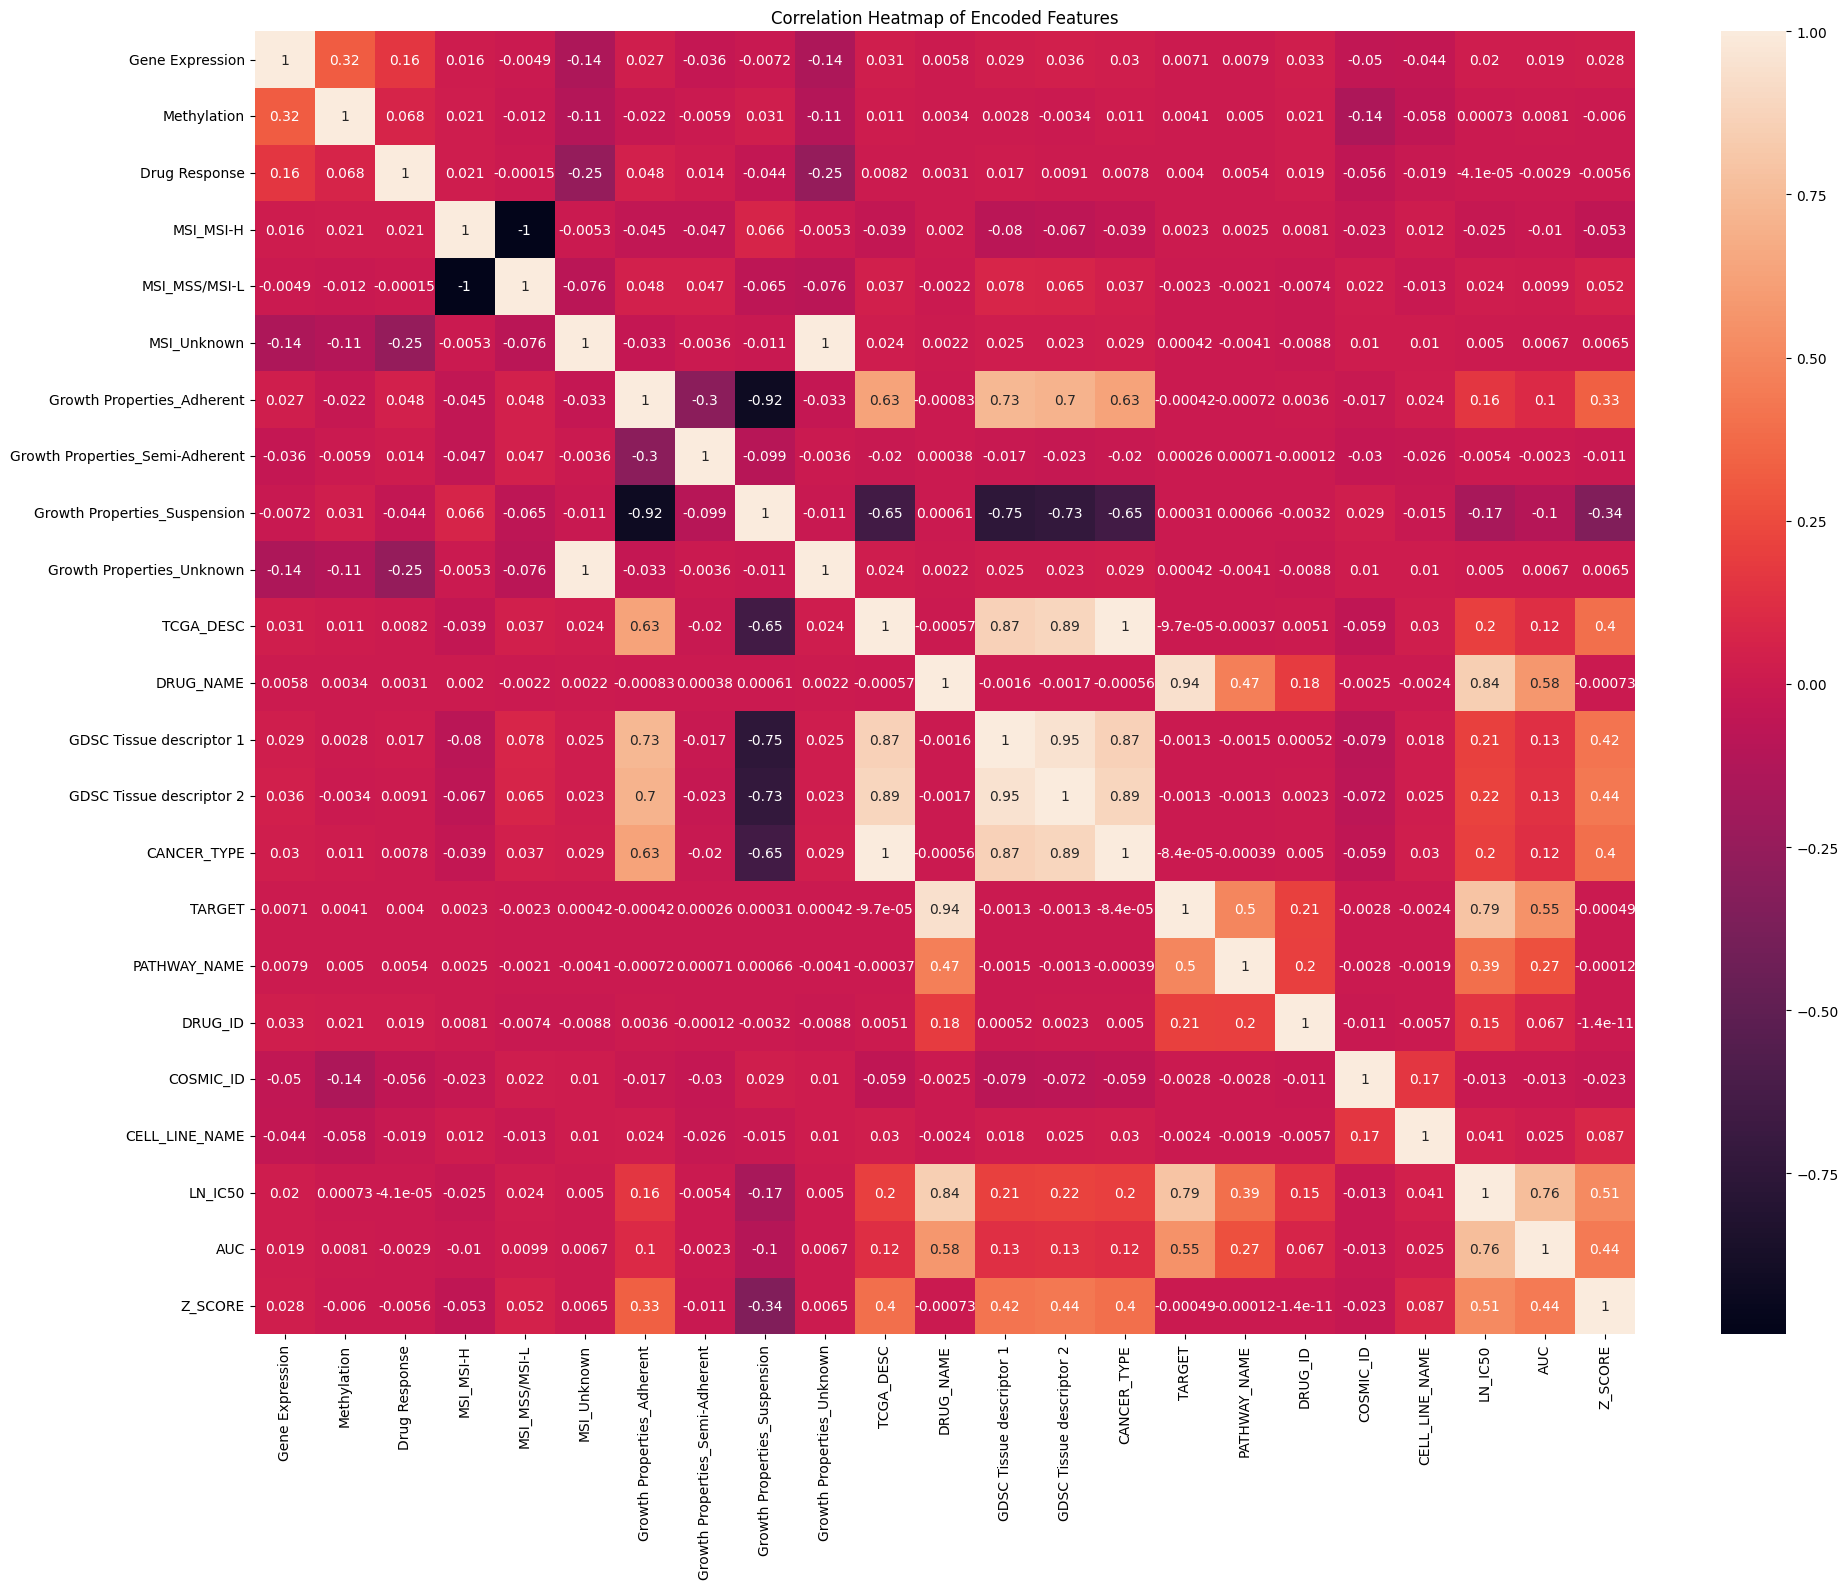

In [375]:
# Correlation Analysis of encoded 
plt.figure(figsize=(20, 16))
correlation_matrix = encoded.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap of Encoded Features')
plt.tight_layout()
plt.show()

In [373]:
# Features to select with correlation
features = ['Z_SCORE', 'AUC', 'PATHWAY_NAME', 'TARGET', 'DRUG_NAME', 'GDSC Tissue descriptor 1',
            'GDSC Tissue descriptor 2', 'CANCER_TYPE', 'TCGA_DESC', 'Growth Properties_Adherent']

In [374]:
# Dataframe to csv
encoded.to_csv('modeling_data.csv', index=False)